### Data Prep Exercises
***Corey Solitaire***
10/27/2020

In [1]:
import acquire
import prepare
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)

from datetime import timedelta, datetime as dt

In [2]:
df = acquire.get_store_data()

## Exercises

### 1. Convert date column to datetime format.

In [3]:
df.sale_date.head()

0    Tue, 01 Jan 2013 00:00:00 GMT
1    Wed, 02 Jan 2013 00:00:00 GMT
2    Thu, 03 Jan 2013 00:00:00 GMT
3    Fri, 04 Jan 2013 00:00:00 GMT
4    Sat, 05 Jan 2013 00:00:00 GMT
Name: sale_date, dtype: object

In [4]:
df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y %H:%M:%S %Z')

In [5]:
df = df.set_index('sale_date').sort_index()
df.head()

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01 00:00:00+00:00,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664
2013-01-01 00:00:00+00:00,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01 00:00:00+00:00,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211


### 2. Plot the distribution of sale_amount and item_price.

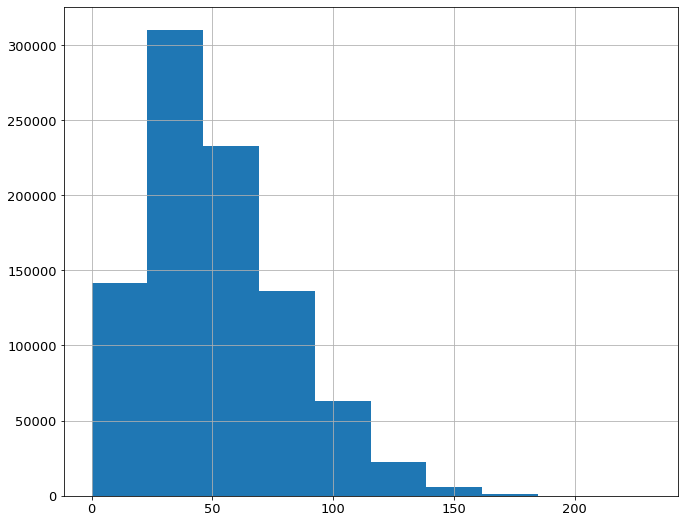

In [6]:
df.sale_amount.hist()

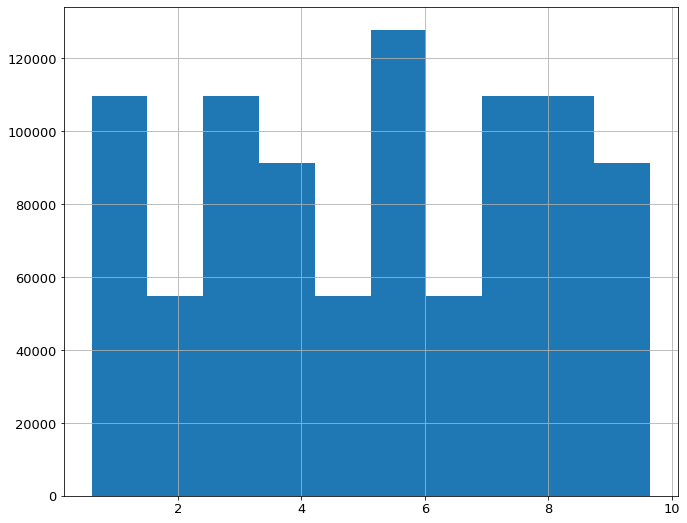

In [7]:
df.item_price.hist()

In [8]:
 def hist_plot(df, col, unit_label='', bins=10):
        
        """
        This function takes in a DataFrame, 
        a string for column name or list,
        a string for unit label, default empty,
        and an integer for number of bins, default 10, and
        displays the distribution of the column.
        """
        plt.hist(df[col], bins=bins, color='thistle', ec='black')
        plt.title('Distribution of ' + col)
        plt.xlabel(unit_label)
        plt.ylabel('Count')
        plt.show()

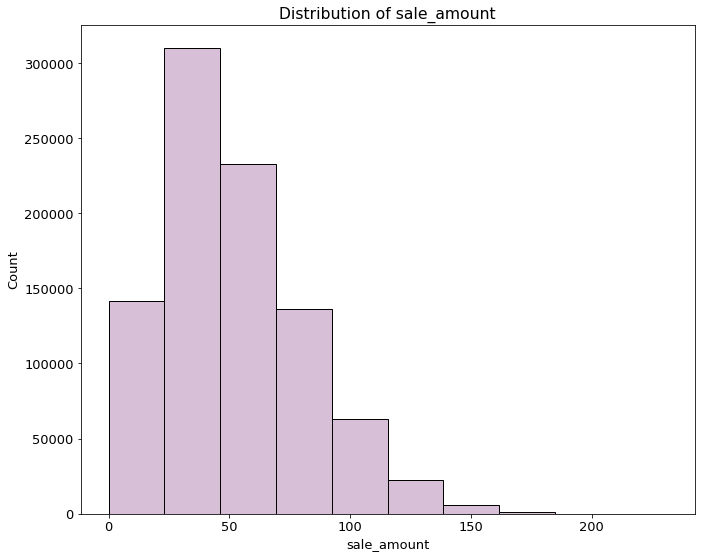

In [9]:
hist_plot(df, 'sale_amount', unit_label= 'sale_amount')

In [10]:
def numeric_hists(df, bins=20):
    """
    Function to take in a DataFrame, bins default 20,
    select only numeric dtypes, and
    display histograms for each numeric column
    """
    num_df = df.select_dtypes(include=np.number)
    num_df.hist(bins=bins, color='thistle', ec='black')
    plt.suptitle('Numeric Column Distributions')
    plt.show()

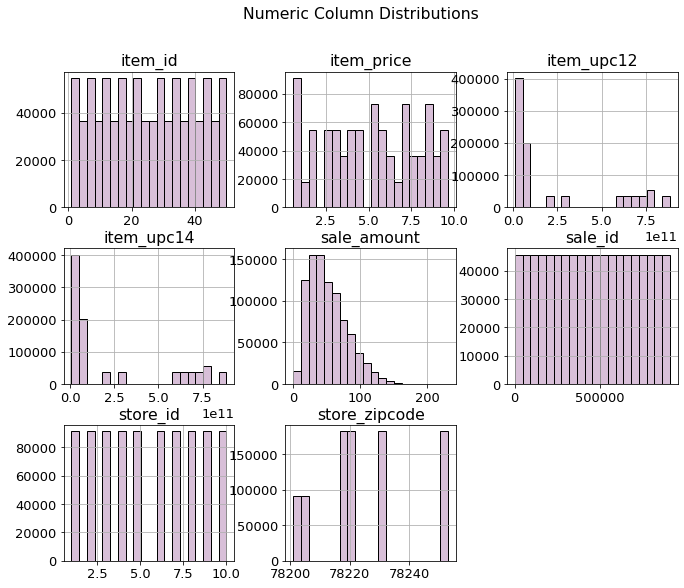

In [11]:
numeric_hists(df)

### 3. Set the index to be the datetime variable.

In [12]:
# Convert sale_date to DateTimeIndex
#     df['sale_date'] = pd.to_datetime(df.sale_date)
#     df = df.set_index('sale_date').sort_index()

### 4. Add a 'month' and 'day of week' column to your dataframe.

In [13]:
# Add Month to dataframe
df['month'] = df.index.month
# Add day of week to dataframe
df['weekday'] = df.index.day_name()

In [14]:
df.head()

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,weekday
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday
2013-01-01 00:00:00+00:00,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday
2013-01-01 00:00:00+00:00,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday
2013-01-01 00:00:00+00:00,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday


### 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [15]:
df['sales_total'] = (df.sale_amount * df.item_price)
df.head()

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,218.40
2013-01-01 00:00:00+00:00,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday,125.55
2013-01-01 00:00:00+00:00,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,453.60
2013-01-01 00:00:00+00:00,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,294.00


### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [16]:
# Call in fresh df
df = pd.read_csv('big_df.csv')
df.head()

,Unnamed: 0,sale_amount,sale_date,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,2,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,3,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,4,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [17]:
def prepped_store_df():
    """
    Function to acquire and prepare
    store dataframe and show
    distributions for numeric columns
    """
    # Acquire the df
    df = df.get_store_data()
    
    # Convert sale_date to DateTimeIndex
    df['sale_date'] = pd.to_datetime(df.sale_date)
    df = df.set_index('sale_date').sort_index()
    
    # Create date part columns
    df['month'] = df.index.month
    df['weekday'] = df.index.day_name()
    
    # Create calculated columns
    df = df.assign(sales_total = df.sale_amount * df.item_price)
    df = df.assign(sales_diff = df.sales_total.diff(periods=1))
    
    # Change dtypes of numeric columns to object and category
    df = (df.astype({'sale_id': object, 'store_id': object, 
                     'store_zipcode': object, 'item_id': object, 
                     'item_upc12': object, 'item_upc14': object, 
                     'month': 'category', 'weekday': 'category'}))
    
    # Display distributions of numeric columns
    numeric_hists(df)

In [18]:
prepped_store_df()

UnboundLocalError: local variable 'df' referenced before assignment